# Overwiew
1. Aggregation and cleaning data
- Aggregating all teams to general table
- Creating separate rows for both team 1 and team 2
- Getting information about total games and total wins of each team
- Converting and rounding numeric data
- Removing unncesessary columns
2. Teams aggregation
- Getting 3 data frames of games of team 1 vs team 2, team 1 vs team 3, team 3 vs team 2  
3. Creating new features
- Will construct features such as ratio game winning, logarithmic efficiency, team experience with captain and so on. But not all of them will be used
4. Creation of target variable and initialization of linear regression model
- Creating a team 1 efficiency as a target variable and making predictions using linear regression
5. Creation of target variable and initialization of logistic regression
- Creating a team 1 win as a target variable and making predictions using logistic regression

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('expand_frame_repr', False)

In [61]:
def aggregate_teams(df):
    # create columns that will be settled in new dataframe
    team_cols = [
      'team_1', 'team_2', 'team_1_win', 'team_2_win', 'date', 'turn_time',
      'team_1_count_without_cap', 'team_2_count_without_cap', 'team_1_eff', 'team_2_eff', 'team_1_exp', 
      'team_2_exp', 'team_1_cap_exp', 'team_2_cap_exp', 'total_games', 
      'team_1_total_win', 'team_2_total_win' 
    ]

    aggregated_teams = pd.DataFrame(columns=team_cols)
    team_1 = pd.DataFrame()
    team_2 = pd.DataFrame()  

    team_count = 0

    cols = df.columns

    for col in cols:
      if 'vs' in col:
        team_count += 1
        continue
      if 'Unnamed' in col:
        if team_1.empty or team_2.empty:
          break

        # aggregate 2 teams and append it to general aggregated_teams dataframe
        aggregated_teams = aggregate_team(aggregated_teams, team_1, team_2)
        
        team_1 = pd.DataFrame()
        team_2 = pd.DataFrame()

        team_count += 1
        continue
      
      if team_count % 2 == 0:
        team_1.loc[:, col] = df[col]
      else:
        team_2.loc[:, col] = df[col]

    return aggregated_teams

def aggregate_team(aggregated_teams, team_1, team_2):
    team_names = [team_1.columns[0].split('.')[0], team_2.columns[0].split('.')[0]]
    team_1.drop(team_1.columns[0], axis=1, inplace=True)
    team_2.drop(team_2.columns[0], axis=1, inplace=True)
    
    new_cols = [
        'date', 'win', 'team_eff', 'team_count_without_cap', 
        'turn_time', 'cap_exp', 'team_exp'
    ]   

    team_1.columns = new_cols
    team_2.columns = team_1.columns

    # create lists which will be used as values of columns in general aggregated_teams dataframe
    team_1_name = []
    team_2_name = []
    team_1_win = []
    team_2_win = []  
    date = []
    turn_time = []
    team_1_eff = []
    team_2_eff = []
    team_1_exp = []
    team_2_exp = []
    team_1_cap_exp = []
    team_2_cap_exp = []
    total_games = []
    team_1_total_win = []
    team_2_total_win = []

    total_games_count = 0
    team_1_total_win_count = 0
    team_2_total_win_count = 0

    for i in range(0, len(team_1)):
        team_1_name.append(team_names[0])
        team_2_name.append(team_names[1])

        date.append(team_1.loc[i, 'date'])

        turn_time.append(team_1.loc[i, 'turn_time'])

        team_1_eff.append(team_1.loc[i, 'team_eff'])
        team_2_eff.append(team_2.loc[i, 'team_eff'])

        team_1_exp.append(team_1.loc[i, 'team_exp'])
        team_2_exp.append(team_2.loc[i, 'team_exp'])

        team_1_cap_exp.append(team_1.loc[i, 'cap_exp'])
        team_2_cap_exp.append(team_2.loc[i, 'cap_exp'])
        
        total_games_count += 1

        total_games.append(total_games_count)

        team_1_total_win_count += team_1.loc[i, 'win']
        team_2_total_win_count += team_2.loc[i, 'win']

        team_1_total_win.append(team_1_total_win_count)
        team_2_total_win.append(team_2_total_win_count)

        team_1_win.append(team_1.loc[i, 'win'])    
        team_2_win.append(team_2.loc[i, 'win'])

    # create columns that will be settled in new dataframe
    cols = [
      'team_1', 'team_2', 'team_1_win', 'team_2_win', 'date', 'turn_time',
      'team_1_count_without_cap', 'team_2_count_without_cap', 'team_1_eff', 
      'team_2_eff', 'team_1_exp', 'team_2_exp', 'team_1_cap_exp', 
      'team_2_cap_exp', 'total_games', 'team_1_total_win', 'team_2_total_win' 
    ]

    df_new_team = pd.DataFrame(columns=cols)

    # fill columns with corresponding team 1(2) values    
    df_new_team.loc[:, 'team_1_win'] = team_1_win
    df_new_team.loc[:, 'team_2_win'] = team_2_win
    df_new_team.loc[:, 'date'] = date    
    df_new_team.loc[:, 'turn_time'] = turn_time
    df_new_team.loc[:, 'team_1_count_without_cap'] = team_1['team_count_without_cap']    
    df_new_team.loc[:, 'team_2_count_without_cap'] = team_2['team_count_without_cap']    
    df_new_team.loc[:, 'team_1_eff'] = team_1_eff
    df_new_team.loc[:, 'team_2_eff'] = team_2_eff
    df_new_team.loc[:, 'team_1_exp'] = team_1_exp
    df_new_team.loc[:, 'team_2_exp'] = team_2_exp
    df_new_team.loc[:, 'team_1_cap_exp'] = team_1_cap_exp
    df_new_team.loc[:, 'team_2_cap_exp'] = team_2_cap_exp
    df_new_team.loc[:, 'total_games'] = total_games
    df_new_team.loc[:, 'team_1_total_win'] = team_1_total_win
    df_new_team.loc[:, 'team_2_total_win'] = team_2_total_win    
    df_new_team.loc[:, 'team_1'] = team_1_name
    df_new_team.loc[:, 'team_2'] = team_2_name

    aggregated_teams = pd.concat([aggregated_teams, df_new_team], ignore_index=True)
    return aggregated_teams

def get_new_features(df):
    """
        features for every team:
        1. win_ratio 
        2. win_weight
        3. win_ratio_weighted
        4. eff
        5. log_eff
        6. eff_weight
        7. exp_with_cap
        8. log_exp_with_cap        
    """

    df.loc[:,'team_1_win_ratio'] = df['team_1_total_win'] / df['total_games']
    df.loc[:,'team_2_win_ratio'] = df['team_2_total_win'] / df['total_games']

    df.loc[:,'team_1_win_weight'] = df['team_1_win'] * np.exp(-df['team_2_eff']/100)
    df.loc[:,'team_2_win_weight'] = df['team_2_win'] * np.exp(-df['team_1_eff']/100)

    df.loc[:,'team_1_win_ratio_weight'] = df['team_1_win_ratio']*np.exp((df['team_1_eff']-df['team_2_eff'])/500)
    df.loc[:,'team_2_win_ratio_weight'] = df['team_2_win_ratio']*np.exp((df['team_2_eff']-df['team_1_eff'])/500)

    df.loc[:,'team_1_log_eff'] = np.log(df['team_1_eff'])
    df.loc[:,'team_2_log_eff'] = np.log(df['team_2_eff'])

    df.loc[:,'team_1_eff_weight'] = df['team_1_eff'] * np.exp(-df['team_2_eff']/100) 
    df.loc[:,'team_2_eff_weight'] = df['team_2_eff'] * np.exp(-df['team_1_eff']/100)

    df.loc[:,'team_1_exp_with_cap'] = df['team_1_exp'] + df['team_1_cap_exp']
    df.loc[:,'team_2_exp_with_cap'] = df['team_2_exp'] + df['team_2_cap_exp']

   # df.loc[:,'team_1_log_exp_with_cap'] = np.log(df['team_1_exp_with_cap'])
   # df.loc[:,'team_2_log_exp_with_cap'] = np.log(df['team_2_exp_with_cap'])

    # fill nan values because of logarithm of a negative number
    df.loc[:,'team_1_log_eff'].fillna(0, inplace=True)
    df.loc[:,'team_2_log_eff'].fillna(0, inplace=True)

    return df

def clean_data(df):
    # replace ',' to '.' in string and convert it to float
    df['team_1_eff'] = df['team_1_eff'].apply(lambda x : parse_string(x))    
    df['team_2_eff'] = df['team_2_eff'].apply(lambda x : parse_string(x))

    df['team_1_exp'] = df['team_1_exp'].apply(lambda x : parse_string(x))    
    df['team_2_exp'] = df['team_2_exp'].apply(lambda x : parse_string(x))

    df['team_1_exp'] = df['team_1_exp'].round(2)   
    df['team_2_exp'] = df['team_2_exp'].round(2)   

    # convert date
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    
    #df = df.dropna()  

    return df

def get_team_difference(df, diff_cols = None):    
    cols_to_drop = [
        'total_games', 'team_1_total_win',
        'team_2_total_win', 'team_2_win',
    ]

    df.drop(cols_to_drop, axis=1, inplace=True)

    team_1_cols = ['team_1_' + i for i in diff_cols] # column names for team 1 stats
    team_2_cols = ['team_2_' + i for i in diff_cols] # column names for team 2 stats 

    new_column_name = [i + '_diff' for i in diff_cols]

    # take the difference
    df_team_1 = df.reindex(columns=team_1_cols)
    df_team_2 = df.reindex(columns=team_2_cols)
    
    df_team_1.columns=new_column_name
    df_team_2.columns=new_column_name
    
    df_diff = df_team_1 - df_team_2
    df_diff.columns = new_column_name
    
    # drop spare columns
    df.drop(team_1_cols + team_2_cols, axis=1, inplace=True)
        
    # concat the main df and df of feature differents 
    df = pd.concat([df, df_diff], axis=1)

    return(df)

def parse_string(string):
    # process a string, replace ',' to '.' and convert to float
    if string != string:
        return string

    return float(string.replace(',', '.'))

# Read csv file

In [62]:
df = pd.read_csv('data/main_data.csv', delimiter=';')
display(df)

,team_1,date,win,actions_efficiency,team_count_without_captain,turn_time,captain_experience,team_experience,vs,team_2,date.1,win.1,actions_efficiency.1,team_count_without_captain.1,turn_time.1,captain_experience.1,team_experience.1,Unnamed: 17,team_3,date.2,win.2,actions_efficiency.2,team_count_without_captain.2,turn_time.2,captain_experience.2,team_experience.2,vs.1,team_2.1,date.3,win.3,actions_efficiency.3,team_count_without_captain.3,turn_time.3,captain_experience.3,team_experience.3,Unnamed: 35,team_1.1,date.4,win.4,actions_efficiency.4,team_count_without_captain.4,turn_time.4,captain_experience.4,team_experience.4,vs.2,team_3.1,date.5,win.5,actions_efficiency.5,team_count_without_captain.5,turn_time.5,captain_experience.5,team_experience.5,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,NaN,27.03.2023,0,"-0,14",1,60,1,1,NaN,NaN,27.03.2023,1,"53,42",2,60,5,"4,666666667",NaN,NaN,27.03.2023 00:00,1.0,"69,56",3.0,60.0,5.0,"4,25",NaN,NaN,27.03.2023,0.0,"53,42",2.0,60.0,5.0,"4,666666667",NaN,NaN,27.03.2023,0.0,"-0,14",1.0,60.0,1.0,1,NaN,NaN,27.03.2023 00:00,1.0,"69,56",3.0,60.0,5.0,"4,25",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,28.03.2023,0,"26,78",1,60,1,1,NaN,NaN,28.03.2023,1,"66,6",2,60,5,"4,666666667",NaN,NaN,28.03.2023 00:00,0.0,"60,68",3.0,30.0,5.0,5,NaN,NaN,28.03.2023,1.0,"66,6",2.0,60.0,5.0,"4,666666667",NaN,NaN,28.03.2023,0.0,"26,78",1.0,60.0,1.0,1,NaN,NaN,28.03.2023 00:00,1.0,"60,68",3.0,30.0,5.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,29.03.2023,1,"38,06",1,30,2,2,NaN,NaN,29.03.2023,0,"26,78",2,30,5,"3,666666667",NaN,NaN,29.03.2023 00:00,1.0,"43,98",3.0,30.0,5.0,4,NaN,NaN,29.03.2023,0.0,"26,78",2.0,30.0,5.0,"3,666666667",NaN,NaN,29.03.2023,0.0,"38,06",1.0,30.0,2.0,2,NaN,NaN,29.03.2023 00:00,1.0,"43,98",3.0,30.0,5.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,30.03.2023,1,"62,16",1,30,2,2,NaN,NaN,30.03.2023,0,"53,64",2,30,5,5,NaN,NaN,30.03.2023 00:00,1.0,"63,44",3.0,30.0,5.0,"4,5",NaN,NaN,30.03.2023,0.0,"53,64",2.0,30.0,5.0,5,NaN,NaN,30.03.2023,0.0,"62,16",1.0,30.0,2.0,2,NaN,NaN,30.03.2023 00:00,1.0,"63,44",3.0,30.0,5.0,"4,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,31.03.2023,0,"26,36",1,40,2,"2,5",NaN,NaN,31.03.2023,1,"48,69",2,45,5,4,NaN,NaN,31.03.2023 00:00,1.0,64,3.0,20.0,5.0,5,NaN,NaN,31.03.2023,0.0,"48,69",2.0,45.0,5.0,4,NaN,NaN,31.03.2023,0.0,"26,36",1.0,40.0,2.0,"2,5",NaN,NaN,31.03.2023 00:00,1.0,64,3.0,20.0,5.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,NaN,12.07.2047,0,"26,8",1,60,2,2,NaN,NaN,12.07.2047,1,44,2,60,3,"2,333333333",NaN,NaN,12.07.2047 00:00,0.0,"68,3",3.0,60.0,4.0,"3,5",NaN,NaN,12.07.2047,1.0,44,2.0,60.0,3.0,"2,333333333",NaN,NaN,12.07.2047,0.0,"26,8",1.0,60.0,2.0,2,NaN,NaN,12.07.2047 00:00,1.0,"68,3",3.0,60.0,4.0,"3,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8874,NaN,13.07.2047,0

# Team aggregating and data cleaning

In [63]:
teams = aggregate_teams(df)
cleaned_teams = clean_data(teams)
display(cleaned_teams)

,team_1,team_2,team_1_win,team_2_win,date,turn_time,team_1_count_without_cap,team_2_count_without_cap,team_1_eff,team_2_eff,team_1_exp,team_2_exp,team_1_cap_exp,team_2_cap_exp,total_games,team_1_total_win,team_2_total_win
0,team_1,team_2,0,1,2023-03-27,60,1,2,-0.14,53.42,1.0,4.67,1,5,1,0,1
1,team_1,team_2,0,1,2023-03-28,60,1,2,26.78,66.60,1.0,4.67,1,5,2,0,2
2,team_1,team_2,1,0,2023-03-29,30,1,2,38.06,26.78,2.0,3.67,2,5,3,1,2
3,team_1,team_2,1,0,2023-03-30,30,1,2,62.16,53.64,2.0,5.00,2,5,4,2,2
4,team_1,team_2,0,1,2023-03-31,40,1,2,26.36,48.69,2.5,4.00,2,5,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26629,team_1,team_3,0.0,1.0,2047-07-12,60.0,1.0,3.0,26.80,68.30,2.0,3.50,2.0,4.0,8874,3282.0,5592.0
26630,team_1,team_3,0.0,1.0,2047-07-13,60.0,1.0,3.0,28.80,83.90,2.5,4.25,1.0,5.0,8875,3282.0,5593.0
26631,team_1,team_3,1.0,0.0,2047-07-14,60.0,1.0,3.0,64.80,50.10,4.5,2.50,4.0,4.0,8876,3283.0,5593.0
26632,team_1,team_3,0.0,1.0,2047-07-15,60.0,1.0,3.0,30.80,63.20,1.5,2.50,2.0,5.0,8877,3283.0,5594.0


# Aggregate team_1 vs team_2, team_1 vs team_3, team_2 vs team_3 

In [50]:
team_1_vs_team_2 = cleaned_teams.copy()
team_1_vs_team_2 = team_1_vs_team_2[(team_1_vs_team_2.team_1 == 'team_1') & (team_1_vs_team_2.team_2 == 'team_2')]
team_1_vs_team_2.reset_index(inplace=True)
print(team_1_vs_team_2)

team_1_vs_team_3 = cleaned_teams.copy()
team_1_vs_team_3 = team_1_vs_team_3[(team_1_vs_team_3.team_1 == 'team_1') & (team_1_vs_team_3.team_2 == 'team_3')]
team_1_vs_team_3.reset_index(inplace=True)
#print(team_1_vs_team_3)

team_3_vs_team_2 = cleaned_teams.copy()
team_3_vs_team_2 = team_3_vs_team_2[(team_3_vs_team_2.team_1 == 'team_3') & (team_3_vs_team_2.team_2 == 'team_2')]
team_3_vs_team_2.reset_index(inplace=True)
#print(team_3_vs_team_2)

      index  team_1  team_2 team_1_win team_2_win       date turn_time team_1_count_without_cap team_2_count_without_cap  team_1_eff  team_2_eff  team_1_exp  team_2_exp team_1_cap_exp team_2_cap_exp total_games team_1_total_win team_2_total_win
0         0  team_1  team_2          0          1 2023-03-27        60                        1                        2       -0.14       53.42         1.0        4.67              1              5           1                0                1
1         1  team_1  team_2          0          1 2023-03-28        60                        1                        2       26.78       66.60         1.0        4.67              1              5           2                0                2
2         2  team_1  team_2          1          0 2023-03-29        30                        1                        2       38.06       26.78         2.0        3.67              2              5           3                1                2
3         3  team_1 

# Creating a new features for each team


In [51]:
team_1_vs_team_2_feat = get_new_features(team_1_vs_team_2)
team_1_vs_team_3_feat = get_new_features(team_1_vs_team_3)
team_3_vs_team_2_feat = get_new_features(team_3_vs_team_2)

print(team_1_vs_team_2_feat)
#print(team_1_vs_team_3_feat)
#print(team_3_vs_team_2_feat)

      index  team_1  team_2 team_1_win team_2_win       date turn_time team_1_count_without_cap team_2_count_without_cap  team_1_eff  team_2_eff  team_1_exp  team_2_exp team_1_cap_exp team_2_cap_exp total_games team_1_total_win team_2_total_win team_1_win_ratio team_2_win_ratio team_1_win_weight team_2_win_weight team_1_win_ratio_weight team_2_win_ratio_weight  team_1_log_eff  team_2_log_eff  team_1_eff_weight  team_2_eff_weight team_1_exp_with_cap team_2_exp_with_cap
0         0  team_1  team_2          0          1 2023-03-27        60                        1                        2       -0.14       53.42         1.0        4.67              1              5           1                0                1              0.0              1.0               0.0          1.001401                     0.0                1.113068        0.000000        3.978185          -0.082059          53.494840                 2.0                9.67
1         1  team_1  team_2          0          1 2023

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Drop unnecessary columns and get final data frame

In [53]:
cols_to_drop = [
    'index', 'team_2_win', 'date', 'turn_time'
]

team_1_vs_team_2_final = team_1_vs_team_2_feat.drop(cols_to_drop, axis=1)
team_1_vs_team_3_final = team_1_vs_team_3_feat.drop(cols_to_drop, axis=1)
team_3_vs_team_2_final = team_3_vs_team_2_feat.drop(cols_to_drop, axis=1)

print(team_1_vs_team_2_final)
#print(team_1_vs_team_3_final)
#print(team_3_vs_team_2_final)

      team_1  team_2 team_1_win team_1_count_without_cap team_2_count_without_cap  team_1_eff  team_2_eff  team_1_exp  team_2_exp team_1_cap_exp team_2_cap_exp total_games team_1_total_win team_2_total_win team_1_win_ratio team_2_win_ratio team_1_win_weight team_2_win_weight team_1_win_ratio_weight team_2_win_ratio_weight  team_1_log_eff  team_2_log_eff  team_1_eff_weight  team_2_eff_weight team_1_exp_with_cap team_2_exp_with_cap
0     team_1  team_2          0                        1                        2       -0.14       53.42         1.0        4.67              1              5           1                0                1              0.0              1.0               0.0          1.001401                     0.0                1.113068        0.000000        3.978185          -0.082059          53.494840                 2.0                9.67
1     team_1  team_2          0                        1                        2       26.78       66.60         1.0        4.67   

# Get the difference between team_1 and team_2 features

In [ ]:
"""
diff_cols = [
  'count_without_cap', 'exp', 'cap_exp', 'win_ratio', 'win_weight', 'win_ratio_weighted', 'eff',
  'log_eff', 'eff_weight', 'exp_with_cap']

df_final_diff = get_team_difference(df, diff_cols)

print(df_final_diff)
"""

# Function for training linear regression model and making predictions with it

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics


def linear_reg(df_final):
  """
  cols_to_keep = [
      'team_1_win', 'team_1_count_without_cap', 'team_1_eff', 'team_1_exp', 'team_1_cap_exp',
      'total_games', 'team_1_total_win', 'team_1_win_ratio', 'team_1_win_weight', 'team_1_eff_weight',
      'team_1_exp_with_cap'
  ]
  """

  cols_to_keep = [
      'team_1_eff', 'team_1_exp', 'team_1_cap_exp', 
      'team_1_win_ratio', 'team_1_win_weight', 'team_1_eff_weight', 'team_1_exp_with_cap'
    ]

  df_final = df_final[cols_to_keep]

  df_final = df_final.dropna()
  print(df_final)

  # data to make predictions
  x = df_final.drop(['team_1_eff'], axis=1)
  # target
  y = df_final['team_1_eff']

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

  model = LinearRegression()
  model.fit(x_train, y_train)

  print(model.intercept_)

  predictions = model.predict(x_test)
  print(predictions[0:10])
  
  m = {
      'Metric': [
          'mean absolute error', 
          'mean squared error', 
          'sqrt mean squared error'
          ],
      'Value': [
          metrics.mean_absolute_error(y_test, predictions),
          metrics.mean_squared_error(y_test, predictions),
          np.sqrt(metrics.mean_squared_error(y_test, predictions)),
          ]
      }
 
  df = pd.DataFrame(m)
  
  print("metrics:")
  display(df)

  print("coeffs:")
  display(pd.DataFrame(model.coef_, x.columns, columns = ['Coeffs']))

  plt.scatter(y_test, predictions)

  #plt.hist(y_test - predictions)


# Making predictions with linear regression

      team_1_eff  team_1_exp team_1_cap_exp team_1_win_ratio team_1_win_weight  team_1_eff_weight team_1_exp_with_cap
0          -0.14         1.0              1              0.0               0.0          -0.082059                 2.0
1          26.78         1.0              1              0.0               0.0          13.758480                 2.0
2          38.06         2.0              2         0.333333          0.765061          29.118213                 4.0
3          62.16         2.0              2              0.5           0.58485          36.354271                 4.0
4          26.36         2.5              2              0.4               0.0          16.198971                 4.5
...          ...         ...            ...              ...               ...                ...                 ...
8873       26.80         2.0              2         0.458305               0.0          17.260176                 4.0
8874       28.80         2.5              1         0.45

,Metric,Value
0,mean absolute error,3.701497
1,mean squared error,21.917454
2,sqrt mean squared error,4.681608


coeffs:


,Coeffs
team_1_exp,0.692561
team_1_cap_exp,0.636229
team_1_win_ratio,6.627773
team_1_win_weight,-9.047986
team_1_eff_weight,1.248136
team_1_exp_with_cap,1.328790


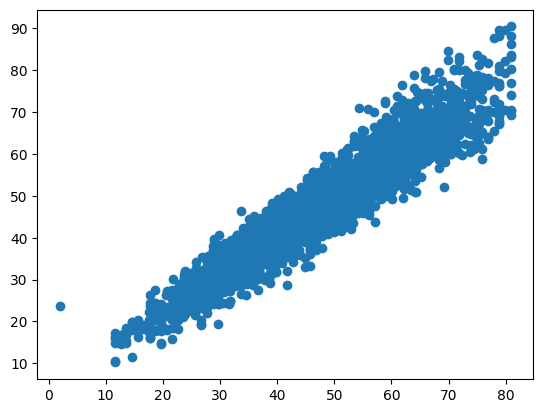

In [54]:
#team_1_vs_team_2_final = team_1_vs_team_2_feat.drop(cols_to_drop, axis=1)
#team_1_vs_team_3_final = team_1_vs_team_3_feat.drop(cols_to_drop, axis=1)
#team_3_vs_team_2_final = team_3_vs_team_2_feat.drop(cols_to_drop, axis=1)

linear_reg(team_1_vs_team_2_final)
#linear_reg(team_1_vs_team_3_final)
#linear_reg(team_3_vs_team_2_final)

      team_1_eff  team_1_exp team_1_cap_exp team_1_win_ratio team_1_win_weight  team_1_eff_weight team_1_exp_with_cap
0          -0.14         1.0            1.0              0.0               0.0          -0.069829                 2.0
1          26.78         1.0            1.0              0.0               0.0          14.597574                 2.0
2          38.06         2.0            2.0              0.0               0.0          24.516929                 4.0
3          62.16         2.0            2.0              0.0               0.0          32.960560                 4.0
4          26.36         2.5            2.0              0.0               0.0          13.899428                 4.5
...          ...         ...            ...              ...               ...                ...                 ...
8872       42.10         3.5            2.0         0.369886               0.0          25.509419                 5.5
8873       26.80         2.0            2.0         0.36

,Metric,Value
0,mean absolute error,3.580783
1,mean squared error,19.926298
2,sqrt mean squared error,4.463888


coeffs:


,Coeffs
team_1_exp,0.681942
team_1_cap_exp,0.603114
team_1_win_ratio,3.403835
team_1_win_weight,-7.970668
team_1_eff_weight,1.290705
team_1_exp_with_cap,1.285056


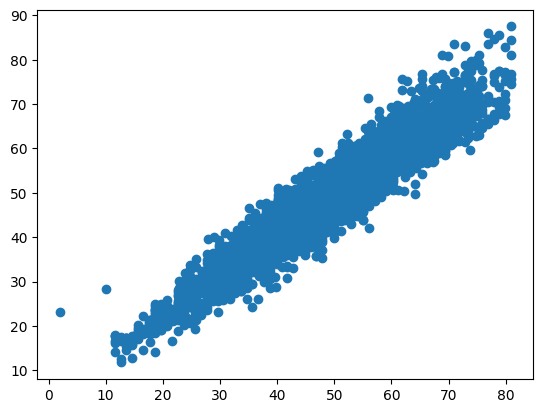

In [55]:
linear_reg(team_1_vs_team_3_final)

      team_1_eff  team_1_exp team_1_cap_exp team_1_win_ratio team_1_win_weight  team_1_eff_weight team_1_exp_with_cap
0          69.56        4.25            5.0              1.0          0.586138          40.771760                9.25
1          60.68        5.00            5.0              0.5               0.0          31.174927                10.0
2          43.98        4.00            5.0         0.666667          0.765061          33.647373                 9.0
3          63.44        4.50            5.0             0.75           0.58485          37.102879                 9.5
4          64.00        5.00            5.0              0.8          0.614528          39.329823                10.0
...          ...         ...            ...              ...               ...                ...                 ...
8872       50.10        3.00            4.0         0.550885               0.0          28.818600                 7.0
8873       68.30        3.50            4.0         0.55

,Metric,Value
0,mean absolute error,4.310218
1,mean squared error,28.454313
2,sqrt mean squared error,5.334258


coeffs:


,Coeffs
team_1_exp,1.167180
team_1_cap_exp,0.622852
team_1_win_ratio,-4.549480
team_1_win_weight,-6.377363
team_1_eff_weight,0.988431
team_1_exp_with_cap,1.790032


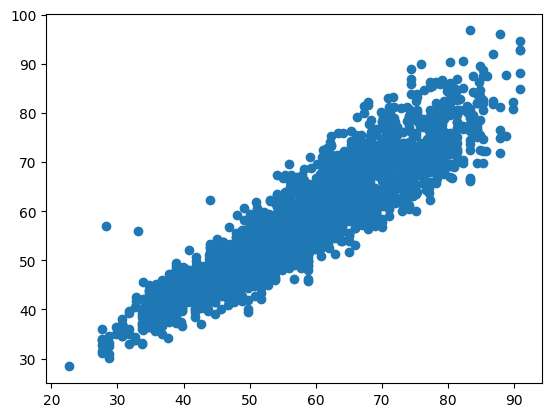

In [56]:
linear_reg(team_3_vs_team_2_final)

# Function for training logistic regression model and making predictions with it

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def logistic_reg(df):
    df_final = df.dropna()

    """
    cols_to_keep = [
        'team_1_win', 'team_1_count_without_cap', 'team_1_eff', 'team_1_exp', 'team_1_cap_exp',
        'total_games', 'team_1_total_win', 'team_1_win_ratio', 'team_1_win_weight', 'team_1_eff_weight',
        'team_1_exp_with_cap'
    ]
    """
    
    cols_to_keep = [
      'team_1_win', 'team_1_eff', 'team_1_log_eff', 'team_1_exp', 'team_1_cap_exp', 
      'team_1_win_ratio', 'team_1_total_win', 'team_1_eff_weight','team_1_exp_with_cap'
    ]

    # will be used in df_final_predict
    team_1 = df_final['team_1']
    team_2 = df_final['team_2']

    df_final = df_final[cols_to_keep]

    print(df_final)
    
    # data to make predictions
    x_data = df_final.drop(['team_1_win'], axis=1)
    # target
    y_data = df_final['team_1_win']
    y_data = y_data.astype('int')

    x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

    model = LogisticRegression(solver='lbfgs', max_iter=1000)

    model.fit(x_training_data, y_training_data)

    predictions = model.predict(x_test_data)

    prob = model.predict_proba(x_test_data)
    # print(prob)
    print(classification_report(y_test_data, predictions))

    # generate a confusion matrix
    print(confusion_matrix(y_test_data, predictions))

    probabilities = model.predict_proba(df_final[x_training_data.columns])
    
    df_final_pred = pd.DataFrame()
    df_final_pred.loc[:,'team_1'] = team_1
    df_final_pred.loc[:,'team_2'] = team_2
    df_final_pred.loc[:,'team_1_win_probability'] = probabilities[:,1]
    
    #df_final_pred = df_final_copy[['team_1', 'team_2', 'team_1_eff', 'team_2_eff','team_1_win_probability']]
    #df_final_pred = df_final_copy[['team_1', 'team_2', 'team_1_win_probability']]
    df_final_pred['team_1_win_probability'] = df_final_pred['team_1_win_probability'].round(6)
    
    path = 'predictions/' + 'logistic_predictions_' + df_final_pred['team_1'].iloc[0] + '_vs_' + df_final_pred['team_2'].iloc[0] + '.csv'
    
    df_final_pred.to_csv(path)

    print(df_final_pred)

    logit_roc_auc = roc_auc_score(y_test_data, model.predict(x_test_data))
    fpr, tpr, thresholds = roc_curve(y_test_data, model.predict_proba(x_test_data)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

# Making predictions with logistic regression

     team_1_win  team_1_eff  team_1_log_eff  team_1_exp team_1_cap_exp team_1_win_ratio team_1_total_win  team_1_eff_weight team_1_exp_with_cap
0             0       -0.14        0.000000         1.0              1              0.0                0          -0.082059                 2.0
1             0       26.78        3.287655         1.0              1              0.0                0          13.758480                 2.0
2             1       38.06        3.639164         2.0              2         0.333333                1          29.118213                 4.0
3             1       62.16        4.129712         2.0              2              0.5                2          36.354271                 4.0
4             0       26.36        3.271848         2.5              2              0.4                2          16.198971                 4.5
...         ...         ...             ...         ...            ...              ...              ...                ...             

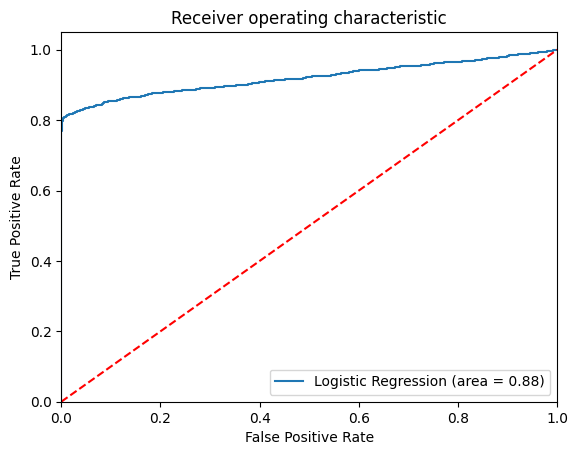

In [44]:
logistic_reg(team_1_vs_team_2_final)

     team_1_win  team_1_eff  team_1_log_eff  team_1_exp team_1_cap_exp team_1_win_ratio team_1_total_win  team_1_eff_weight team_1_exp_with_cap
0           0.0       -0.14        0.000000         1.0            1.0              0.0              0.0          -0.069829                 2.0
1           0.0       26.78        3.287655         1.0            1.0              0.0              0.0          14.597574                 2.0
2           0.0       38.06        3.639164         2.0            2.0              0.0              0.0          24.516929                 4.0
3           0.0       62.16        4.129712         2.0            2.0              0.0              0.0          32.960560                 4.0
4           0.0       26.36        3.271848         2.5            2.0              0.0              0.0          13.899428                 4.5
...         ...         ...             ...         ...            ...              ...              ...                ...             

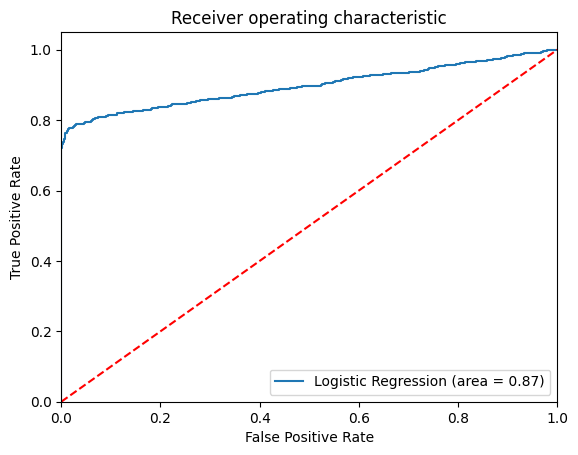

In [45]:
logistic_reg(team_1_vs_team_3_final)

     team_1_win  team_1_eff  team_1_log_eff  team_1_exp team_1_cap_exp team_1_win_ratio team_1_total_win  team_1_eff_weight team_1_exp_with_cap
0           1.0       69.56        4.242190        4.25            5.0              1.0              1.0          40.771760                9.25
1           0.0       60.68        4.105614        5.00            5.0              0.5              1.0          31.174927                10.0
2           1.0       43.98        3.783735        4.00            5.0         0.666667              2.0          33.647373                 9.0
3           1.0       63.44        4.150095        4.50            5.0             0.75              3.0          37.102879                 9.5
4           1.0       64.00        4.158883        5.00            5.0              0.8              4.0          39.329823                10.0
...         ...         ...             ...         ...            ...              ...              ...                ...             

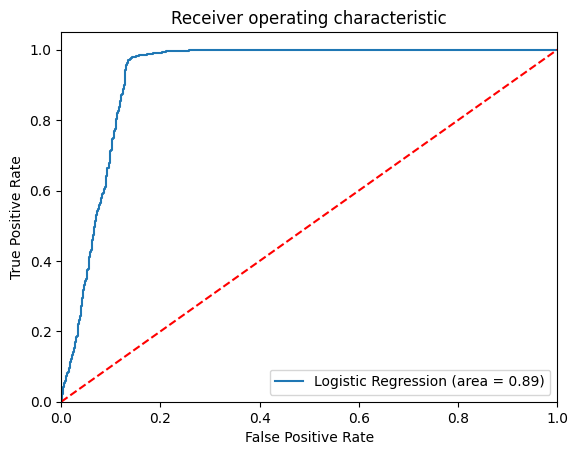

In [46]:
logistic_reg(team_3_vs_team_2_final)